In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

td_transactions = pd.read_parquet('/content/drive/MyDrive/data/td_transactions.parquet')
td_transactions.head(10)

,account_number,amount,date,transaction_type,transaction_category
0,123451,147800.65,2020-11-26,D,PURCH
1,123451,38458.19,2020-11-26,D,OTHR
2,123451,73427.39,2020-11-13,D,OTHR
3,123451,18104.31,2020-11-10,D,OTHR
4,123451,93781.27,2020-11-26,D,OTHR
5,123451,16216.08,2020-11-25,D,OTHR
6,123451,95669.50,2020-11-03,D,OTHR
7,123451,10043.45,2020-11-24,D,OTHR
8,123451,101842.13,2020-11-27,D,OTHR
9,123451,35051.21,2020-11-02,D,OTHR


In [ ]:
#td_transactions[(td_transactions.transaction_category == 'W/D') & (td_transactions.transaction_type == 'C')]

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

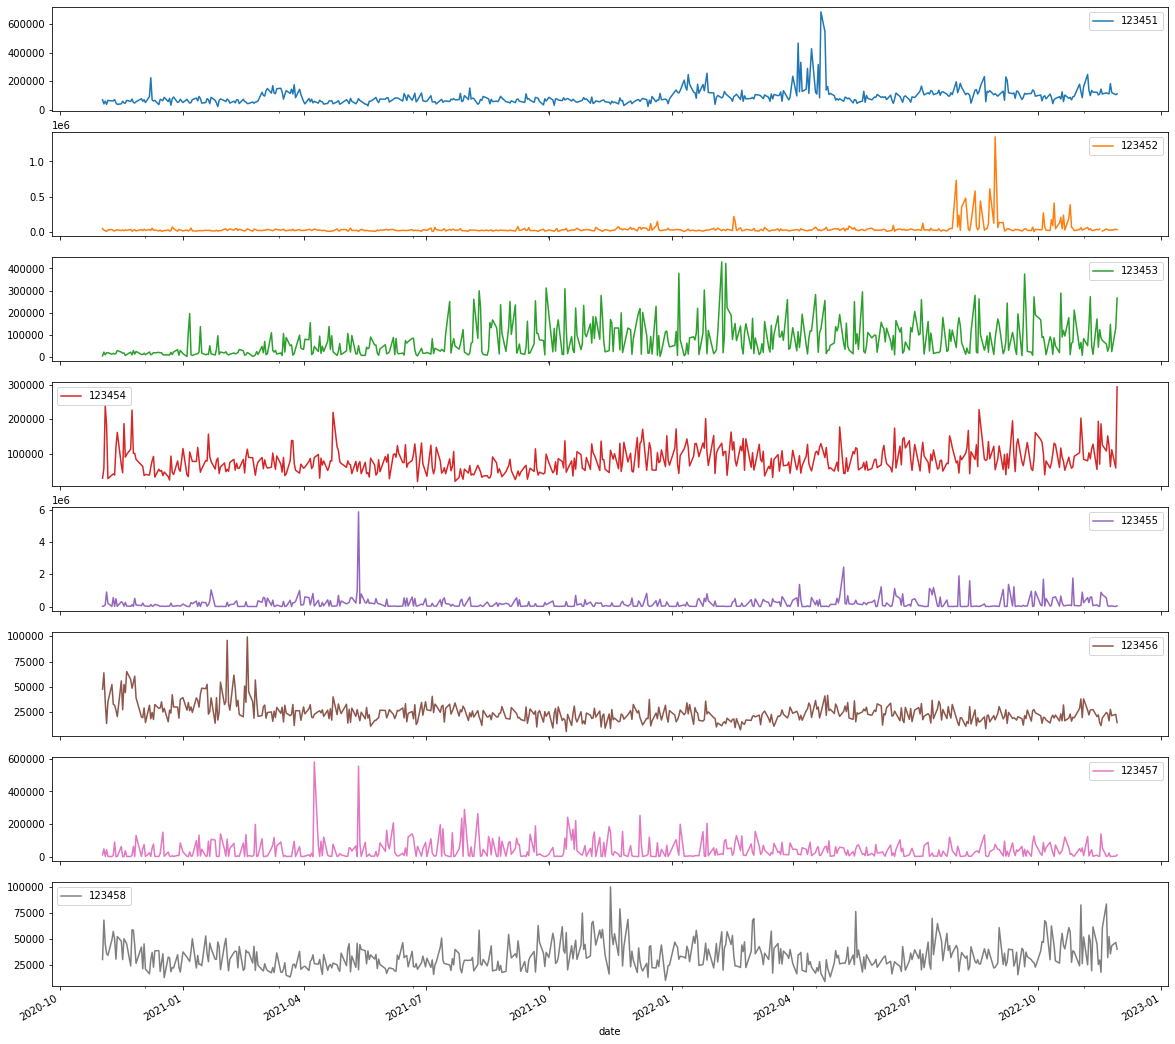

In [ ]:
import matplotlib.pyplot as plt
pd.pivot_table(td_transactions.reset_index(),
               index='date', columns='account_number', values='amount'
              ).plot(subplots=True, figsize=(20, 20))

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

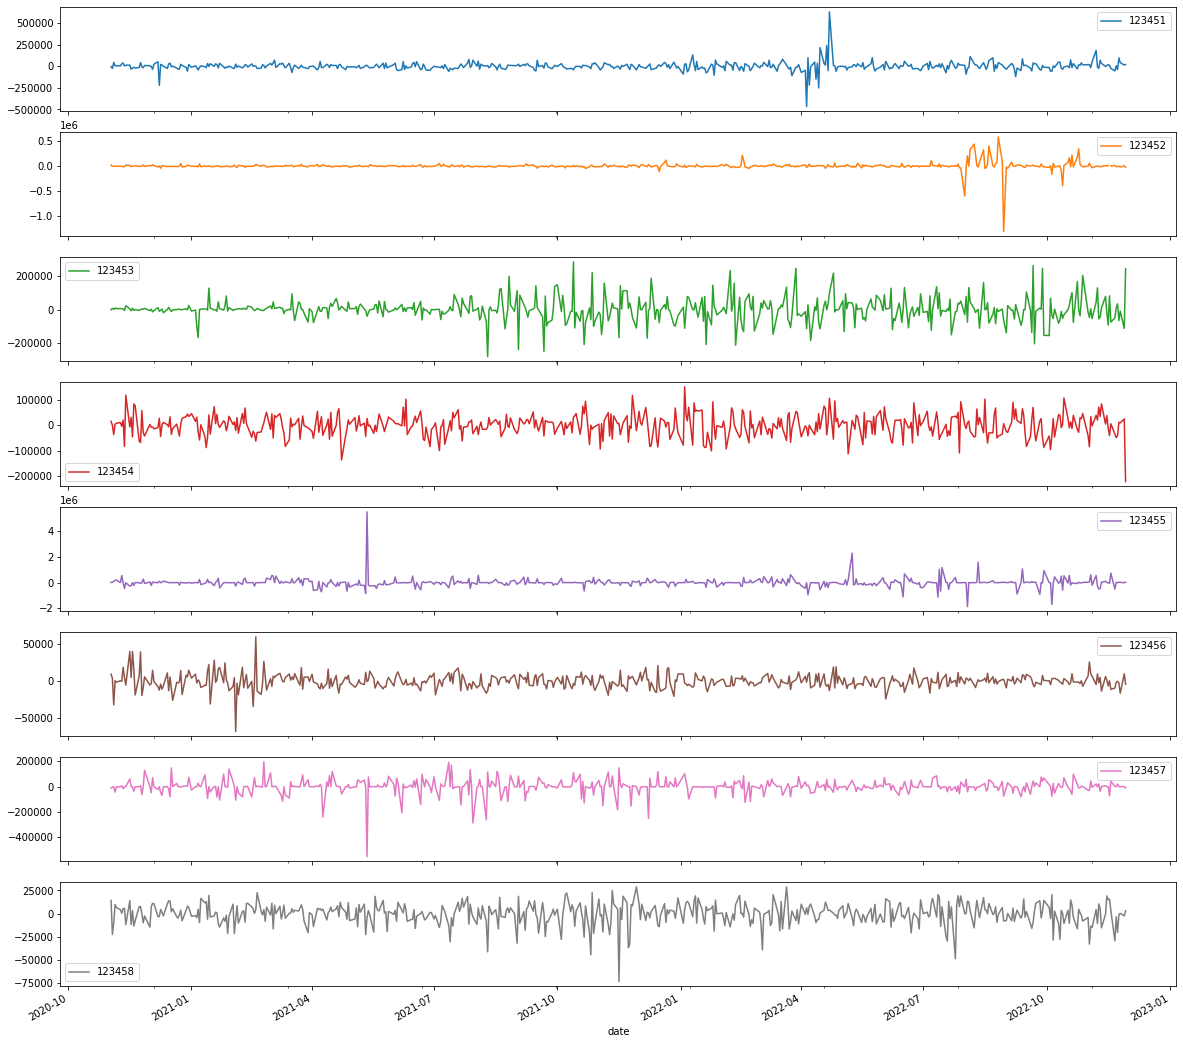

In [ ]:
td_transactions['updated_amount'] = td_transactions.amount.mask(td_transactions.transaction_type == 'D', td_transactions.amount *(-1), inplace=False)

pd.pivot_table(td_transactions.reset_index(),
               index='date', columns='account_number', values='updated_amount'
              ).plot(subplots=True, figsize=(20, 20))

In [ ]:
## adding missing dates
account_numbers = td_transactions.account_number.unique()
full_range = pd.date_range(td_transactions.date.min(), td_transactions.date.max(), freq='D')

ts_data = pd.DataFrame()
for idx, account_number in enumerate(account_numbers):

    td_transactions_i = td_transactions.loc[td_transactions.account_number == account_number, ['date', 'amount', 'transaction_category', 'transaction_type', 'updated_amount']]
    #td_transactions_i.set_index('date', inplace=True)
    difference = full_range.difference(td_transactions_i.date)

    td_transactions_i['account_number'] = account_number
    temp = difference.to_frame(index=False, name='date')
    temp['account_number'] = account_number
    temp['amount'] = 0
    temp['updated_amount'] = 0
    temp['transaction_category'] = 'IDLE'
    temp['transaction_type'] = 'IDLE'
    td_transactions_i = pd.concat([td_transactions_i, temp])
    td_transactions_i.set_index('date', inplace=True)
    ts_data = pd.concat([ts_data, td_transactions_i])


In [ ]:
ts_data

,amount,transaction_category,transaction_type,updated_amount,account_number
date,,,,,
2020-11-26,147800.65,PURCH,D,-147800.65,123451
2020-11-26,38458.19,OTHR,D,-38458.19,123451
2020-11-13,73427.39,OTHR,D,-73427.39,123451
2020-11-10,18104.31,OTHR,D,-18104.31,123451
2020-11-26,93781.27,OTHR,D,-93781.27,123451
...,...,...,...,...,...
2022-11-13,0.00,IDLE,IDLE,0.00,123458
2022-11-19,0.00,IDLE,IDLE,0.00,123458
2022-11-20,0.00,IDLE,IDLE,0.00,123458


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

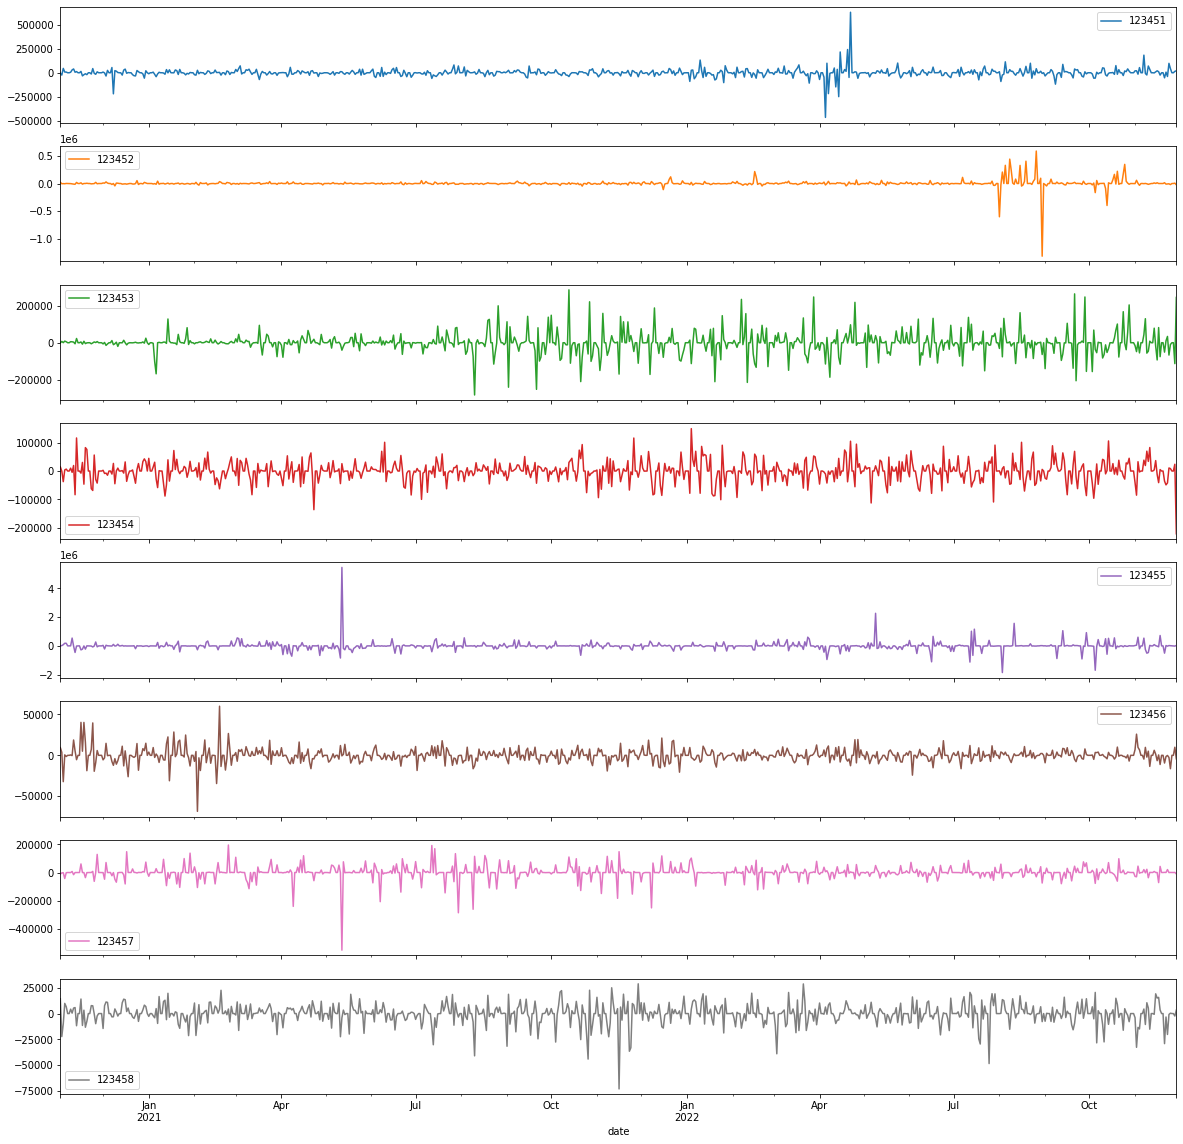

In [ ]:
pd.pivot_table(ts_data.reset_index(),
               index='date', columns='account_number', values='updated_amount'
              ).plot(subplots=True, figsize=(20, 20))

In [ ]:
ts_data.sort_values(['account_number','date'], ascending=[True,True], inplace=True)
ts_data

#ts_data.loc['2020-11-02':'2020-11-05']

,amount,transaction_category,transaction_type,updated_amount,account_number
date,,,,,
2020-11-02,35051.21,OTHR,D,-35051.21,123451
2020-11-02,88899.38,OTHR,D,-88899.38,123451
2020-11-02,17058.56,OTHR,D,-17058.56,123451
2020-11-02,103726.75,OTHR,D,-103726.75,123451
2020-11-02,107323.58,OTHR,D,-107323.58,123451
...,...,...,...,...,...
2022-11-29,141461.46,OTHR,C,141461.46,123458
2022-11-29,219895.25,OTHR,C,219895.25,123458
2022-11-29,115401.39,DEP,C,115401.39,123458


In [ ]:
ts_data = ts_data.groupby(['account_number', 'date'])['updated_amount'].sum().reset_index()
ts_data


,account_number,date,updated_amount
0,123451,2020-11-02,-48896.60
1,123451,2020-11-03,-264119.61
2,123451,2020-11-04,545666.15
3,123451,2020-11-05,44721.26
4,123451,2020-11-06,126321.62
...,...,...,...
6059,123458,2022-11-25,26412.55
6060,123458,2022-11-26,0.00
6061,123458,2022-11-27,0.00
6062,123458,2022-11-28,-164408.46


In [ ]:
ts_data['current_cash_flow'] = ts_data.groupby(['account_number'])['updated_amount'].cumsum()
ts_data

,account_number,date,updated_amount,current_cash_flow
0,123451,2020-11-02,-48896.60,-48896.60
1,123451,2020-11-03,-264119.61,-313016.21
2,123451,2020-11-04,545666.15,232649.94
3,123451,2020-11-05,44721.26,277371.20
4,123451,2020-11-06,126321.62,403692.82
...,...,...,...,...
6059,123458,2022-11-25,26412.55,-12612761.81
6060,123458,2022-11-26,0.00,-12612761.81
6061,123458,2022-11-27,0.00,-12612761.81
6062,123458,2022-11-28,-164408.46,-12777170.27


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

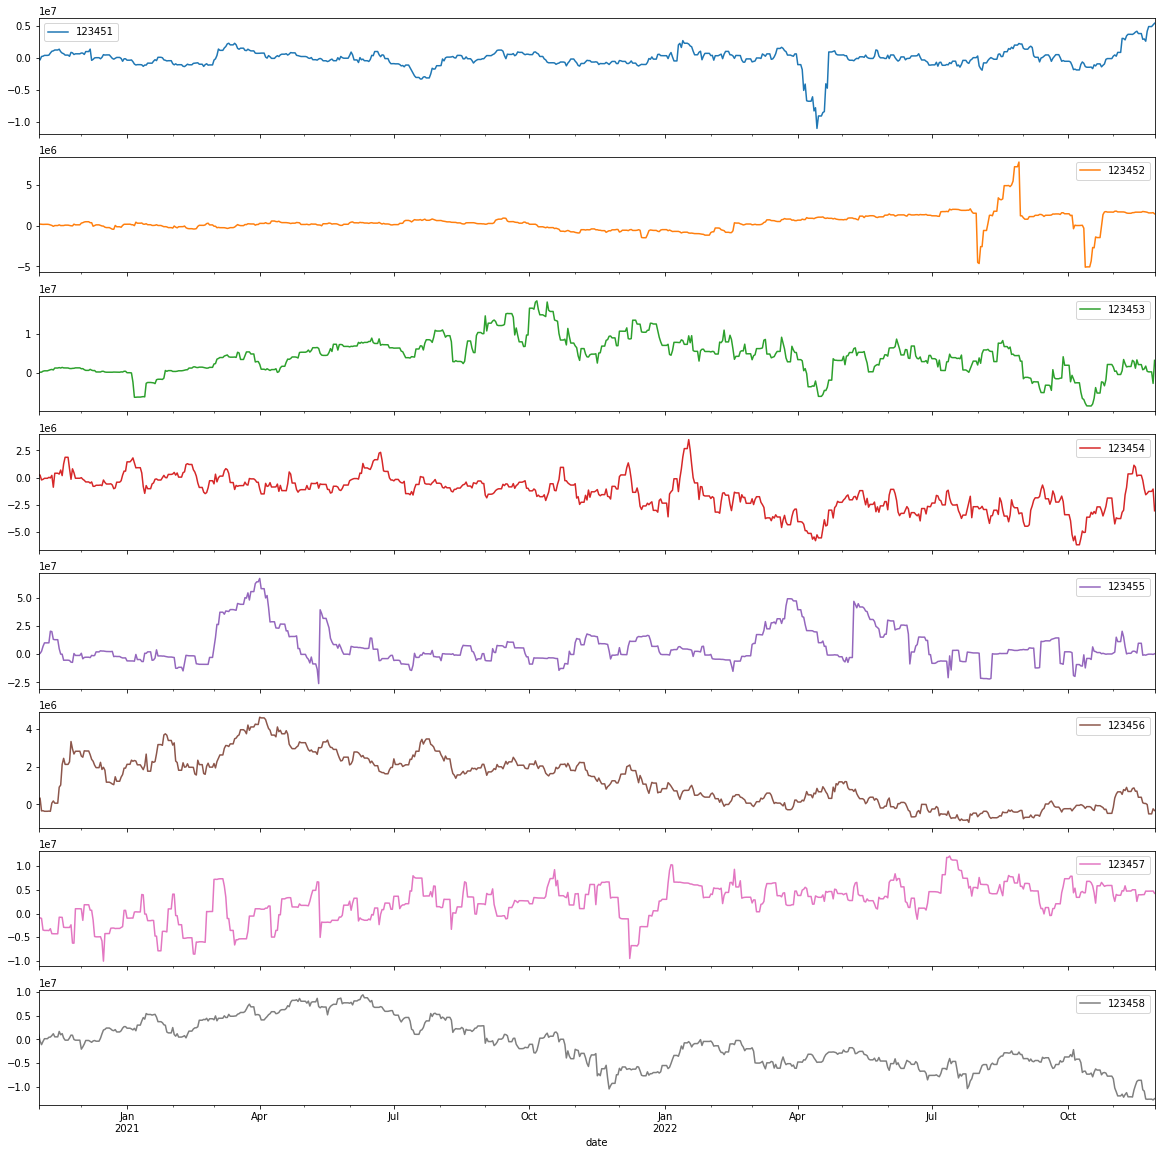

In [ ]:
pd.pivot_table(ts_data.reset_index(),
               index='date', columns='account_number', values='current_cash_flow'
              ).plot(subplots=True, figsize=(20, 20))

In [ ]:
from typing import Optional, List
import plotly.express as px

def plot_current_cash_flow(
    ts_data: pd.DataFrame,
    account_numbers: Optional[List[int]] = None,
    ):
    """
    Plot time-series data
    """
    ts_data_to_plot = ts_data[ts_data.account_number.isin(account_numbers)] if account_numbers.any() else ts_data

    fig = px.line(
        ts_data_to_plot,
        x="date",
        y="current_cash_flow",
        color='account_number',
        template='none',
    )

    fig.show()

In [ ]:
#account_numbers = ts_data['account_number'].value_counts()
account_numbers = ts_data['account_number'].unique()
account_numbers

array(['123451', '123452', '123453', '123454', '123455', '123456',
       '123457', '123458'], dtype=object)

In [ ]:
plot_current_cash_flow(ts_data, account_numbers=account_numbers)

In [ ]:

plot_current_cash_flow(ts_data, account_numbers= account_numbers[0])

AttributeError: ignored

In [ ]:
ts_ac0_1y= ts_data.loc[(ts_data['date']>'2020-11-01') & (ts_data['date']<'2021-11-02')]
#ts_ac0_1y
plot_current_cash_flow(ts_ac0_1y, account_numbers= account_numbers[0:2])


In [ ]:
ts_ac0_1m= ts_data.loc[(ts_data['date']>'2020-11-02') & (ts_data['date']<'2020-12-02')]
plot_current_cash_flow(ts_ac0_1m, account_numbers= account_numbers[0:2])


In [ ]:
ts_data.to_parquet('../data/transformed/td_ts_data.parquet')

In [ ]:
###
#  TEST

"""
data = {
    'account_number':['ac1', 'ac1', 'ac2', 'ac2', 'ac2', 'ac3', 'ac3', 'ac1', 'ac2', 'ac3'],
    'date':['2022-01-02', '2022-01-01', '2022-01-01', '2022-01-03', '2022-01-03', '2022-01-02', '2022-01-02', '2022-01-01', '2022-01-01', '2022-01-01'],
    'updated_amount':[-5, 9, 11, -8, 3, 4, 2, 6, -7, 16]
}

df = pd.DataFrame.from_dict(data, orient='index').transpose().set_index('date')
df['updated_amount'] = df['updated_amount'].astype(float)
df.sort_values(['account_number', 'date'], ascending=[True, True], inplace=True)
df = df.groupby(['account_number', 'date'])['updated_amount'].sum().reset_index()
df['current_cash_flow'] = df.groupby(['account_number'])['updated_amount'].cumsum()
"""